In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

data = pd.read_csv('HR_comma_sep.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [9]:
x = data[['average_montly_hours']]
y = data[['satisfaction_level']]

In [10]:
print(x)

       average_montly_hours
0                       157
1                       262
2                       272
3                       223
4                       159
...                     ...
14994                   151
14995                   160
14996                   143
14997                   280
14998                   158

[14999 rows x 1 columns]


In [11]:
print(y)

       satisfaction_level
0                    0.38
1                    0.80
2                    0.11
3                    0.72
4                    0.37
...                   ...
14994                0.40
14995                0.37
14996                0.37
14997                0.11
14998                0.37

[14999 rows x 1 columns]


In [12]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x_1= sc_x.fit_transform(x)
y_1= sc_y.fit_transform(y)

In [13]:
print(x_1)

[[-0.88203988]
 [ 1.22042276]
 [ 1.4206573 ]
 ...
 [-1.16236823]
 [ 1.58084493]
 [-0.86201642]]


In [14]:
print(y_1)


[[-0.93649469]
 [ 0.75281433]
 [-2.02247906]
 ...
 [-0.97671633]
 [-2.02247906]
 [-0.97671633]]


In [15]:
from sklearn.svm import SVR

model=SVR(kernel='rbf')
model.fit(x_1,y_1)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [16]:
prediction=model.predict(sc_x.transform([[0.55]]))
sc_y.inverse_transform(prediction)

array([0.62097873])

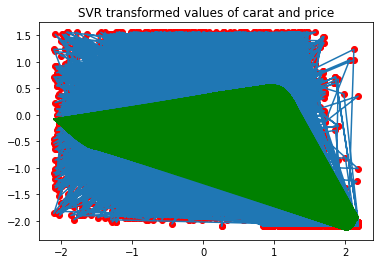

In [17]:
plt.plot(x_1,y_1)
plt.scatter (x_1,y_1, color='red')
plt.title('SVR transformed values of carat and price')
plt.plot(x_1, model.predict(x_1), color='green')
plt.show()
